# Deep Learning-Based Price Prediction: Volkswagen Used Car Market Analysis

# Introduction

This project was developed to analyze the key parameters affecting the prices of Volkswagen vehicles in the UK used car market and to generate highly accurate price predictions using a Deep Learning approach.

# Importing Libraries and Dataset

In [1041]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1042]:
df = pd.read_csv("vw.csv")

# Data Overview

In [1043]:
df.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,145,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,145,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,145,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,145,42.2,1.5


In [1044]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [1045]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


# Exploratory Data Analysis (EDA)

## Data Cleaning

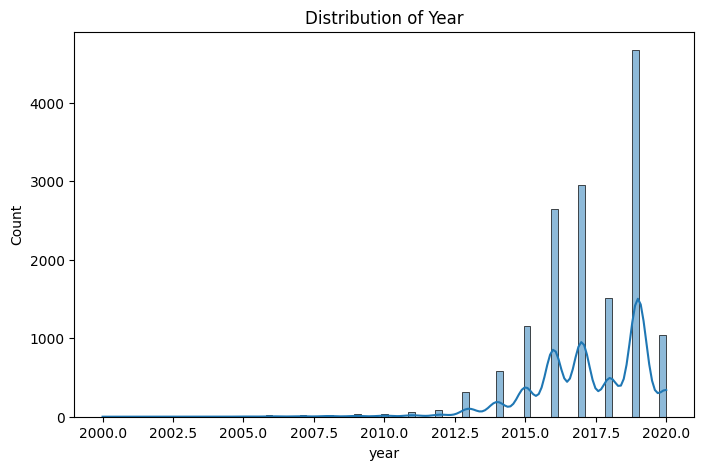

In [1046]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["year"], kde=True)
plt.title("Distribution of Year")
plt.show()

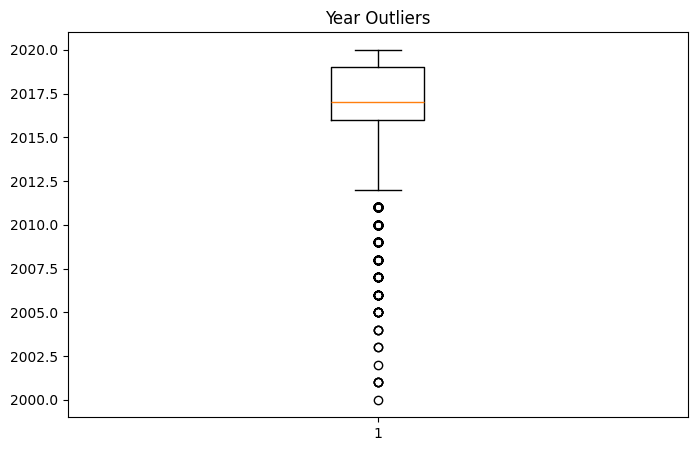

In [1047]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["year"])
plt.title("Year Outliers")
plt.show()

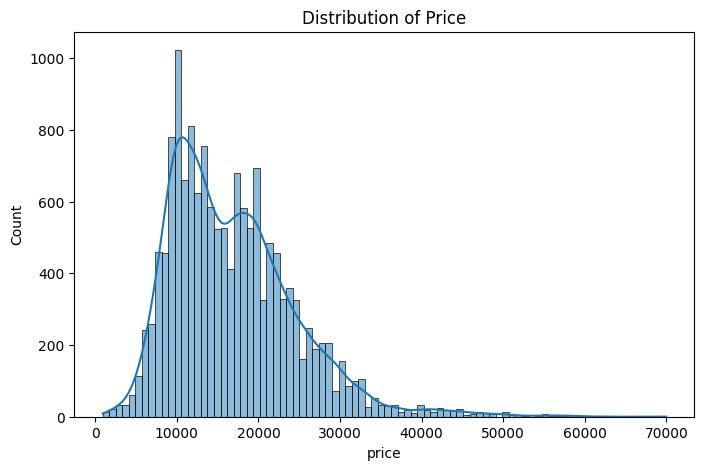

In [1048]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["price"], kde=True)
plt.title("Distribution of Price")
plt.show()

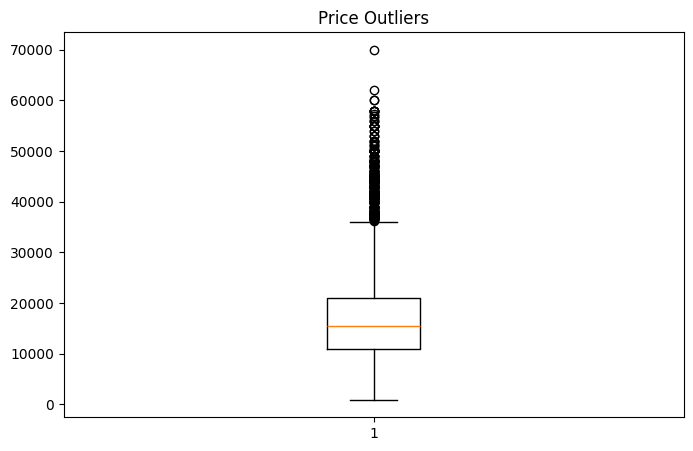

In [1049]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["price"])
plt.title("Price Outliers")
plt.show()

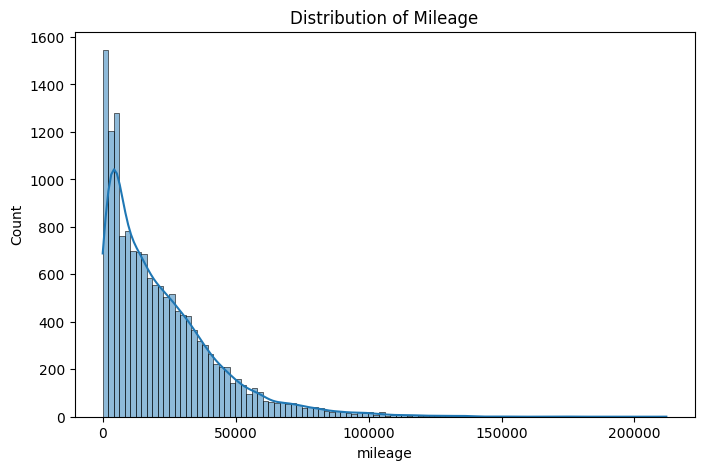

In [1050]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["mileage"], kde=True)
plt.title("Distribution of Mileage")
plt.show()

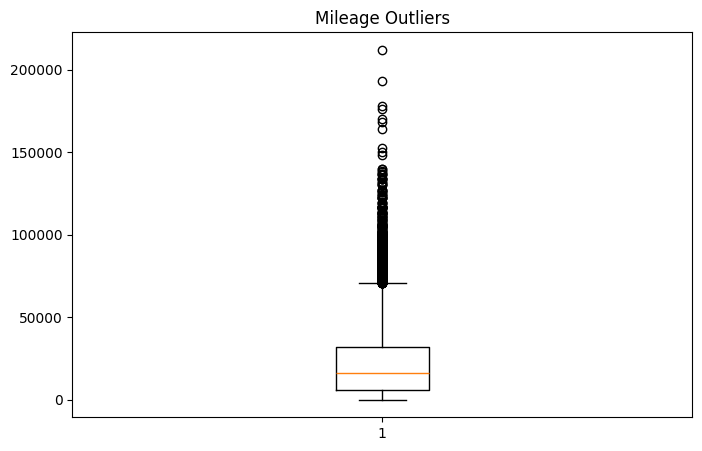

In [1051]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["mileage"])
plt.title("Mileage Outliers")
plt.show()

In [1052]:
df_clean = df[(df["year"] >= 2011) & (df["price"] < 35000) & (df["mileage"] < 90000)] # Aykırı değer (Outlier) temizliği
deletedCount = len(df) - len(df_clean)
print(f"{deletedCount} data deleted.")

654 data deleted.


Total data lost is 4.34% (under 5%)

In [1053]:
df = df_clean.copy()

## Data Preprocessing & Encoding

In [1054]:
# (Converting categorical variables into numerical format)
df_final = pd.get_dummies(df, columns=["model", "transmission", "fuelType"] )
df_final.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ CC', 'model_ Caddy',
       'model_ Caddy Life', 'model_ Caddy Maxi', 'model_ Caddy Maxi Life',
       'model_ Caravelle', 'model_ Eos', 'model_ Golf', 'model_ Golf SV',
       'model_ Jetta', 'model_ Passat', 'model_ Polo', 'model_ Scirocco',
       'model_ Sharan', 'model_ Shuttle', 'model_ T-Cross', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Touran', 'model_ Up', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [1055]:
df = df_final.copy()

## Correlation Analysis and Insights

In [1056]:
df.corr(numeric_only=True)["price"] # Analyzing the relationships between features and price

,price
year,0.643694
price,1.000000
mileage,-0.529462
tax,0.552138
mpg,-0.487149
engineSize,0.548917
model_ Amarok,0.107929
model_ Arteon,0.194977
model_ Beetle,-0.056700
model_ CC,-0.068627


* Year (0.64): Strong positive correlation. As the vehicle's age decreases, the market value significantly increases, consistent with expectations.

* EngineSize (0.54): A positive relationship exists; higher engine displacement often points to luxury or performance segments, leading to higher prices.

* Mileage (-0.52): A moderate negative correlation. However, the strong brand image of VW in the used car market slightly mitigates the depreciation caused by high mileage.

* MPG (-0.50): Interestingly, higher fuel efficiency is associated with lower prices, as highly efficient cars are typically entry-level, economy models like the Polo.

In [1057]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000
mean,2017.336206,16419.177412,20965.039647,111.271806,54.179411,1.572530
std,1.792325,6538.794739,18131.253092,61.937284,13.172355,0.434592
min,2011.000000,3495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10995.000000,6000.000000,30.000000,47.100000,1.200000
50%,2017.000000,15490.000000,16459.000000,145.000000,53.300000,1.500000
75%,2019.000000,20899.000000,31143.000000,145.000000,60.100000,2.000000
max,2020.000000,34999.000000,89924.000000,325.000000,188.300000,3.000000


# Preprocessing

In [1058]:
y = df["price"].values # Splitting data
x = df.drop("price", axis=1).values

In [1059]:
x

array([[2019, 13904, 145, ..., False, False, False],
       [2019, 4562, 145, ..., False, False, False],
       [2019, 7414, 145, ..., False, False, False],
       ...,
       [2015, 41850, 125, ..., False, False, False],
       [2014, 58000, 125, ..., False, False, False],
       [2012, 74000, 125, ..., False, False, False]], dtype=object)

In [1060]:
y

array([25000, 26883, 20000, ..., 12495,  8950,  5990])

## Train-Test Split

In [1061]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1062]:
len(x_train)

10152

In [1063]:
len(x_test)

4351

## Scaling


In [1064]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1065]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1066]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [1067]:
x_train.shape

(10152, 37)

# Model Architecture

In [1068]:
model = Sequential()

model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse",metrics=["mae"])
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1, patience=25)

In [1069]:
model.fit(x=x_train, y = y_train, validation_data=(x_test,y_test), batch_size=100,epochs=300, verbose=1, callbacks=[early_stop])

Epoch 1/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 308516736.0000 - mae: 16289.5449 - val_loss: 78108184.0000 - val_mae: 6700.1040
Epoch 2/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42473528.0000 - mae: 5253.2705 - val_loss: 19157742.0000 - val_mae: 3502.8157
Epoch 3/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17283244.0000 - mae: 3296.8682 - val_loss: 12167823.0000 - val_mae: 2615.2410
Epoch 4/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11621338.0000 - mae: 2558.9358 - val_loss: 9495600.0000 - val_mae: 2262.7729
Epoch 5/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9029048.0000 - mae: 2236.2473 - val_loss: 8048840.5000 - val_mae: 2089.2378
Epoch 6/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7846706.0000 - mae: 2087.3721 - val_loss: 7159536.5000 - val_mae: 1982.5360
Epoch 7/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7013864.0000 - mae: 1974.9091 - val_loss: 6600785.5000 - val_mae: 1869.8362
Epoch 8/300
102/102 ━━━━━━━━━━━━

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


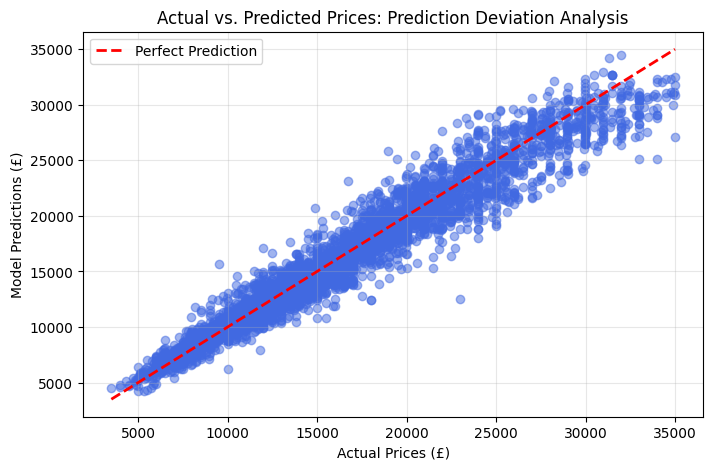

In [1070]:
y_pred = model.predict(x_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , "r--", lw=2, label="Perfect Prediction")

plt.xlabel("Actual Prices (£)")
plt.ylabel("Model Predictions (£)")
plt.title("Actual vs. Predicted Prices: Prediction Deviation Analysis")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [1071]:
lossData = pd.DataFrame(model.history.history)

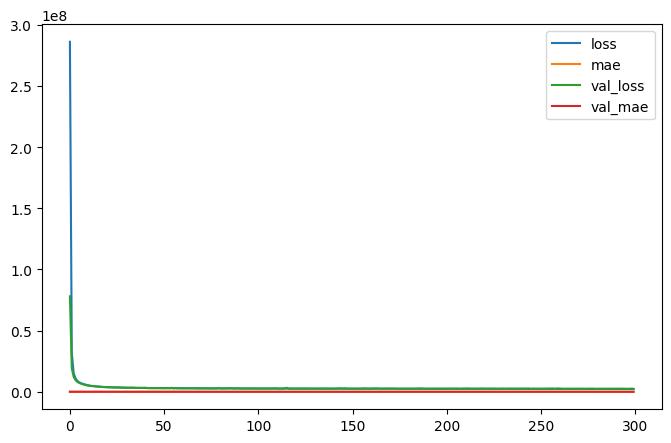

In [1072]:
lossData.plot(figsize=(8, 5))
plt.show()

In [1073]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

predictArray = model.predict(x_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Error Analysis

In [1074]:
predictArray

array([[24463.307],
       [13958.511],
       [ 9770.983],
       ...,
       [10314.335],
       [13130.776],
       [12701.247]], dtype=float32)

In [1075]:
mean_absolute_error(y_test,predictArray)

1115.0078125

In [1076]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Model's Mean Absolute Percentage Error (MAPE): %{mape * 100:.2f}")

Model's Mean Absolute Percentage Error (MAPE): %6.81


In [1077]:
# Error Rate for the First 10 Observations:
y_pred = model.predict(x_test)

test_result = pd.DataFrame(y_test, columns=["Actual Price"])
test_result["Predicted Price"] = y_pred
test_result["Difference (Deviation)"] = test_result["Actual Price"] - test_result["Predicted Price"]
test_result["Error Rate %"] = (abs(test_result["Difference (Deviation)"]) / test_result["Actual Price"]) * 100

print(test_result.head(10))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Actual Price  Predicted Price  Difference (Deviation)  Error Rate %
0         23990     24463.306641             -473.306641      1.972933
1         16650     13958.510742             2691.489258     16.165101
2          9890      9770.983398              119.016602      1.203403
3         28995     27759.232422             1235.767578      4.262002
4         19590     22204.259766            -2614.259766     13.344869
5         13995     12612.586914             1382.413086      9.877907
6          7250      7653.748535             -403.748535      5.568945
7         16490     13793.186523             2696.813477     16.354236
8         11012     11388.092773             -376.092773      3.415299
9          8440      9019.946289             -579.946289      6.871402


In [1078]:
# Most Inaccurate Predictions
highest_deviations = test_result.sort_values(by="Error Rate %", ascending=False).head(10)
print("The Most Inaccurate Model Predictions:")
print(highest_deviations)

The Most Inaccurate Model Predictions:
      Actual Price  Predicted Price  Difference (Deviation)  Error Rate %
1980          9500     15640.746094            -6140.746094     64.639433
2764         23000     12517.120117            10482.879883     45.577739
3614          8199     11809.792969            -3610.792969     44.039431
3693         11995     17099.451172            -5104.451172     42.554824
3699         10495     14603.161133            -4108.161133     39.143984
3463         14900     20699.396484            -5799.396484     38.922124
2150         16750     23137.064453            -6387.064453     38.131728
394           9995      6242.296387             3752.703613     37.545809
4011          9120     12505.331055            -3385.331055     37.119858
1399          7960     10896.467773            -2936.467773     36.890299


In [1079]:
df.iloc[highest_deviations.index]

,year,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
2006,2019,17498,4821,145,47.1,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2790,2019,28725,5737,145,32.8,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3643,2017,19490,17913,150,44.1,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3723,2018,13626,13737,145,49.6,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3729,2019,27734,4148,145,37.7,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3491,2020,26490,1000,145,44.1,1.5,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2176,2014,9020,52294,30,53.3,1.4,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
399,2018,19750,23299,145,53.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4043,2016,13495,32000,0,65.7,1.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1423,2019,17298,7574,145,47.1,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [1080]:
x_test_df = pd.DataFrame(x_test, columns=df.drop("price", axis=1).columns)
year_index = list(df.drop("price", axis=1).columns).index("year")
x_test_df["year"] = scaler.inverse_transform(x_test)[:, year_index]

year_mae = []

for year in sorted(x_test_df["year"].unique()):
    mask = x_test_df["year"] == year
    if mask.sum() > 10:
        mae = mean_absolute_error(y_test[mask], y_pred[mask])
        year_mae.append((year, mae))

pd.DataFrame(year_mae, columns=["year", "mae"])

,year,mae
0,2011.0,1063.396973
1,2012.0,917.329651
2,2013.0,815.262756
3,2014.0,774.707336
4,2015.0,847.085449
5,2016.0,826.417847
6,2017.0,948.907410
7,2018.0,1174.999146
8,2019.0,1416.340332
9,2020.0,1525.259033


In [1081]:
#Pre-2018 and Post-2018 MAE Values
x_test_df = pd.DataFrame(x_test, columns=df.drop("price", axis=1).columns)

year_index = list(df.drop("price", axis=1).columns).index("year")
x_test_df["year"] = scaler.inverse_transform(x_test)[:, year_index]

new_mask = x_test_df["year"] >= 2018

mae_new = mean_absolute_error(y_test[new_mask], y_pred[new_mask])
mae_old = mean_absolute_error(y_test[~new_mask], y_pred[~new_mask])

print("2018+ MAE:", mae_new)
print("Pre-2018 MAE:", mae_old)

2018+ MAE: 1380.1029052734375
Pre-2018 MAE: 875.540771484375


#Model Performance Analysis and Constraints

Analysis of the predictions with the highest error rates reveals a common characteristic: these observations predominantly consist of relatively newer vehicles. Based on this finding, year-based Mean Absolute Error (MAE) values were analyzed.

It was observed that between 2011 and 2017, error values remained relatively stable compared to the global MAE (≈ £1115). However, starting from 2018, a significant increase in error values emerges.

Segment-based results:

Pre-2018 MAE: £875

2018 and Later MAE: £1380

A detailed year-by-year inspection shows that MAE values for 2018, 2019, and 2020 models rise to £1174, £1416, and £1525, respectively. bu durum, the model struggles to fully capture the pricing dynamics of vehicles manufactured in 2018 and later.

Potential reasons for this increase include:

* Higher price variance among newer vehicles.

* Limited representation of hardware features, engine types, and technological differences in the dataset.

* The non-linear nature of the vehicle depreciation curve.

* Higher average price levels in the post-2018 segment.

* The sensitivity of newer vehicle prices to warranty status, current market conditions, and model-specific demand dynamics.

Consequently, the dataset has been evaluated by segmenting it into pre-2018 and post-2018 categories.

#Executive Summary


**Model:** A Deep Neural Network (DNN) consisting of 7 hidden layers and 1 output layer (8 layers in total).

**Success Rate:** 93.19% (MAPE: 6.81%).

**Key Observation:** While the model provides highly stable results for vehicles manufactured between 2011 and 2017, it exhibits higher deviations for vehicles manufactured in 2018 and later.